In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations, product

import matplotlib.pyplot as plt 

from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate

from ucimlrepo import fetch_ucirepo 

# from utils import plot_decision_tree, plot_decision_surface, plot_feature_importance, plot_partial_dependence
from utils import get_data, get_df_details, plot_distrb

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
X = pd.read_csv('data/CC GENERAL.csv')
X.drop(columns=['CUST_ID'], inplace=True)
X.ffill(inplace=True)
X.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
X.shape

(8950, 17)

In [7]:
X_summary = get_df_details(X)
X_summary

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.394205  3638.616165  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   865.225790  2376.929826   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.488256   312.096808   815.375602   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  nunique  n_nulls    dtype  
BALANCE                           19043.13856     8871        0  float64  
BALANCE_FREQUENCY                     1.00000       43        0  float64  
PURCHASES                         49039.57000     6203        0  float64  
ONEOFF_PURCHASES                  40761.25000     4014        0  float64  
INSTALLMENTS_PURCHASES            22500.00000     4452        0  float64  
CASH_ADVANCE                      47137.21176     4323        0  float64  
PURCHASES_FREQUENCY                   1.00000       47        0  float64  
ONEOFF_PURCHASES_FREQUENCY            1.00000       47        0  float64  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000       47        0  float64  
CASH_ADVANCE_FREQUENCY                1.50000       54        0  float64  
CASH_ADVANCE_TRX                    123.00000       65        0    int64  
PURCHASES_TRX                       358.00000      173        0    int64  
CREDIT_LIMIT                      30000.00000      205        0  float64  
PAYMENTS                          50721.48336     8711        0  float64  
MINIMUM_PAYMENTS                  76406.20752     8636        0  float64  
PRC_FULL_PAYMENT         

# EDA - on the FULL data set
1. For the binary/Categorical value to a % plot of distribution
2. For the continuous/integer data - do a violin plot distribution
3. Do a correlation plot of the numeric series

In [8]:

X_eda = X.copy()

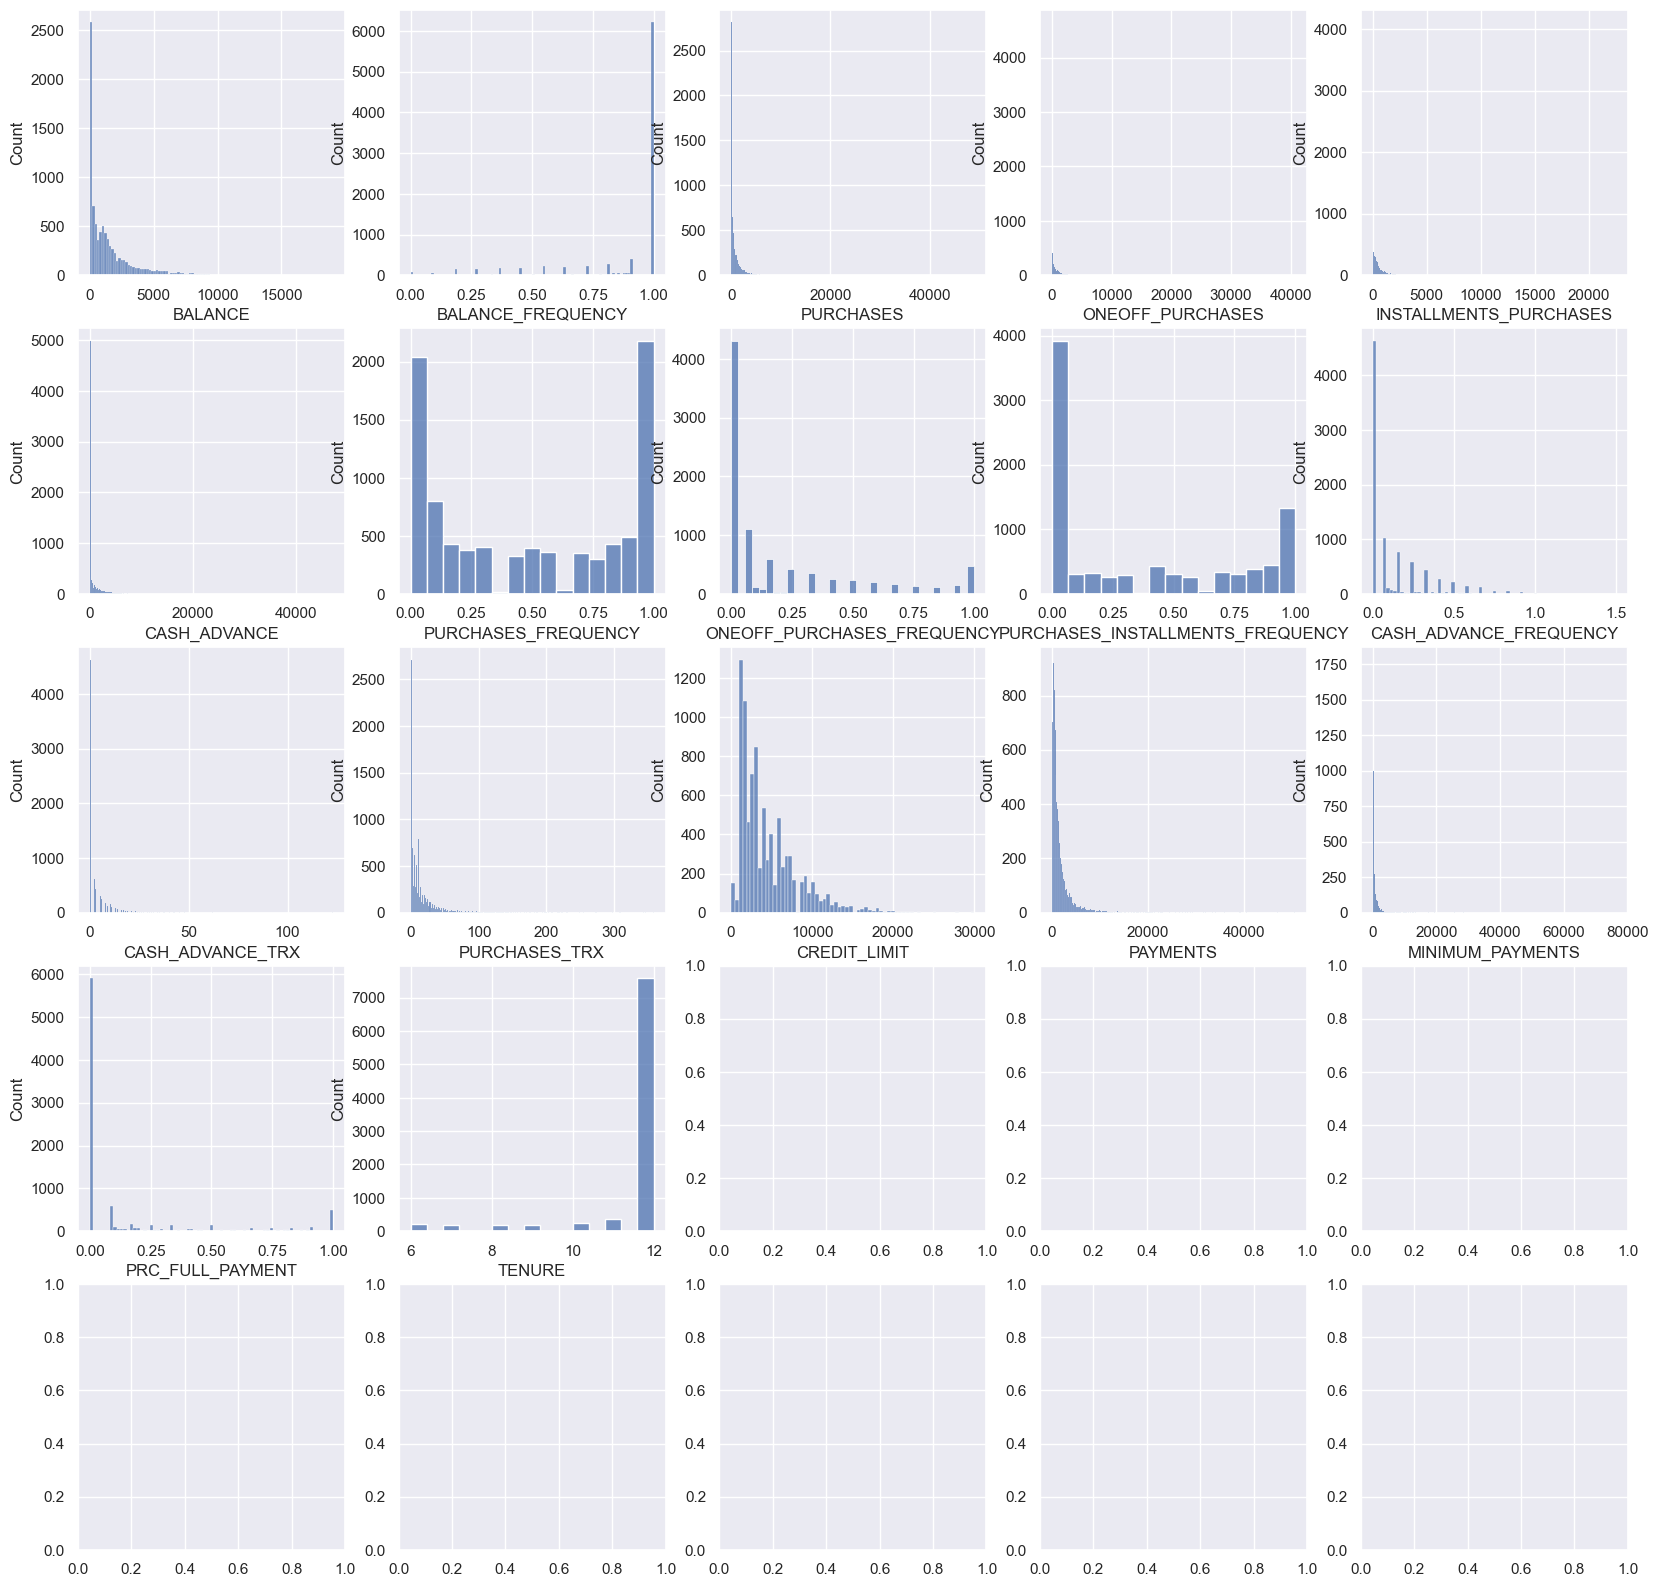

In [9]:
plot_distrb(X_eda)

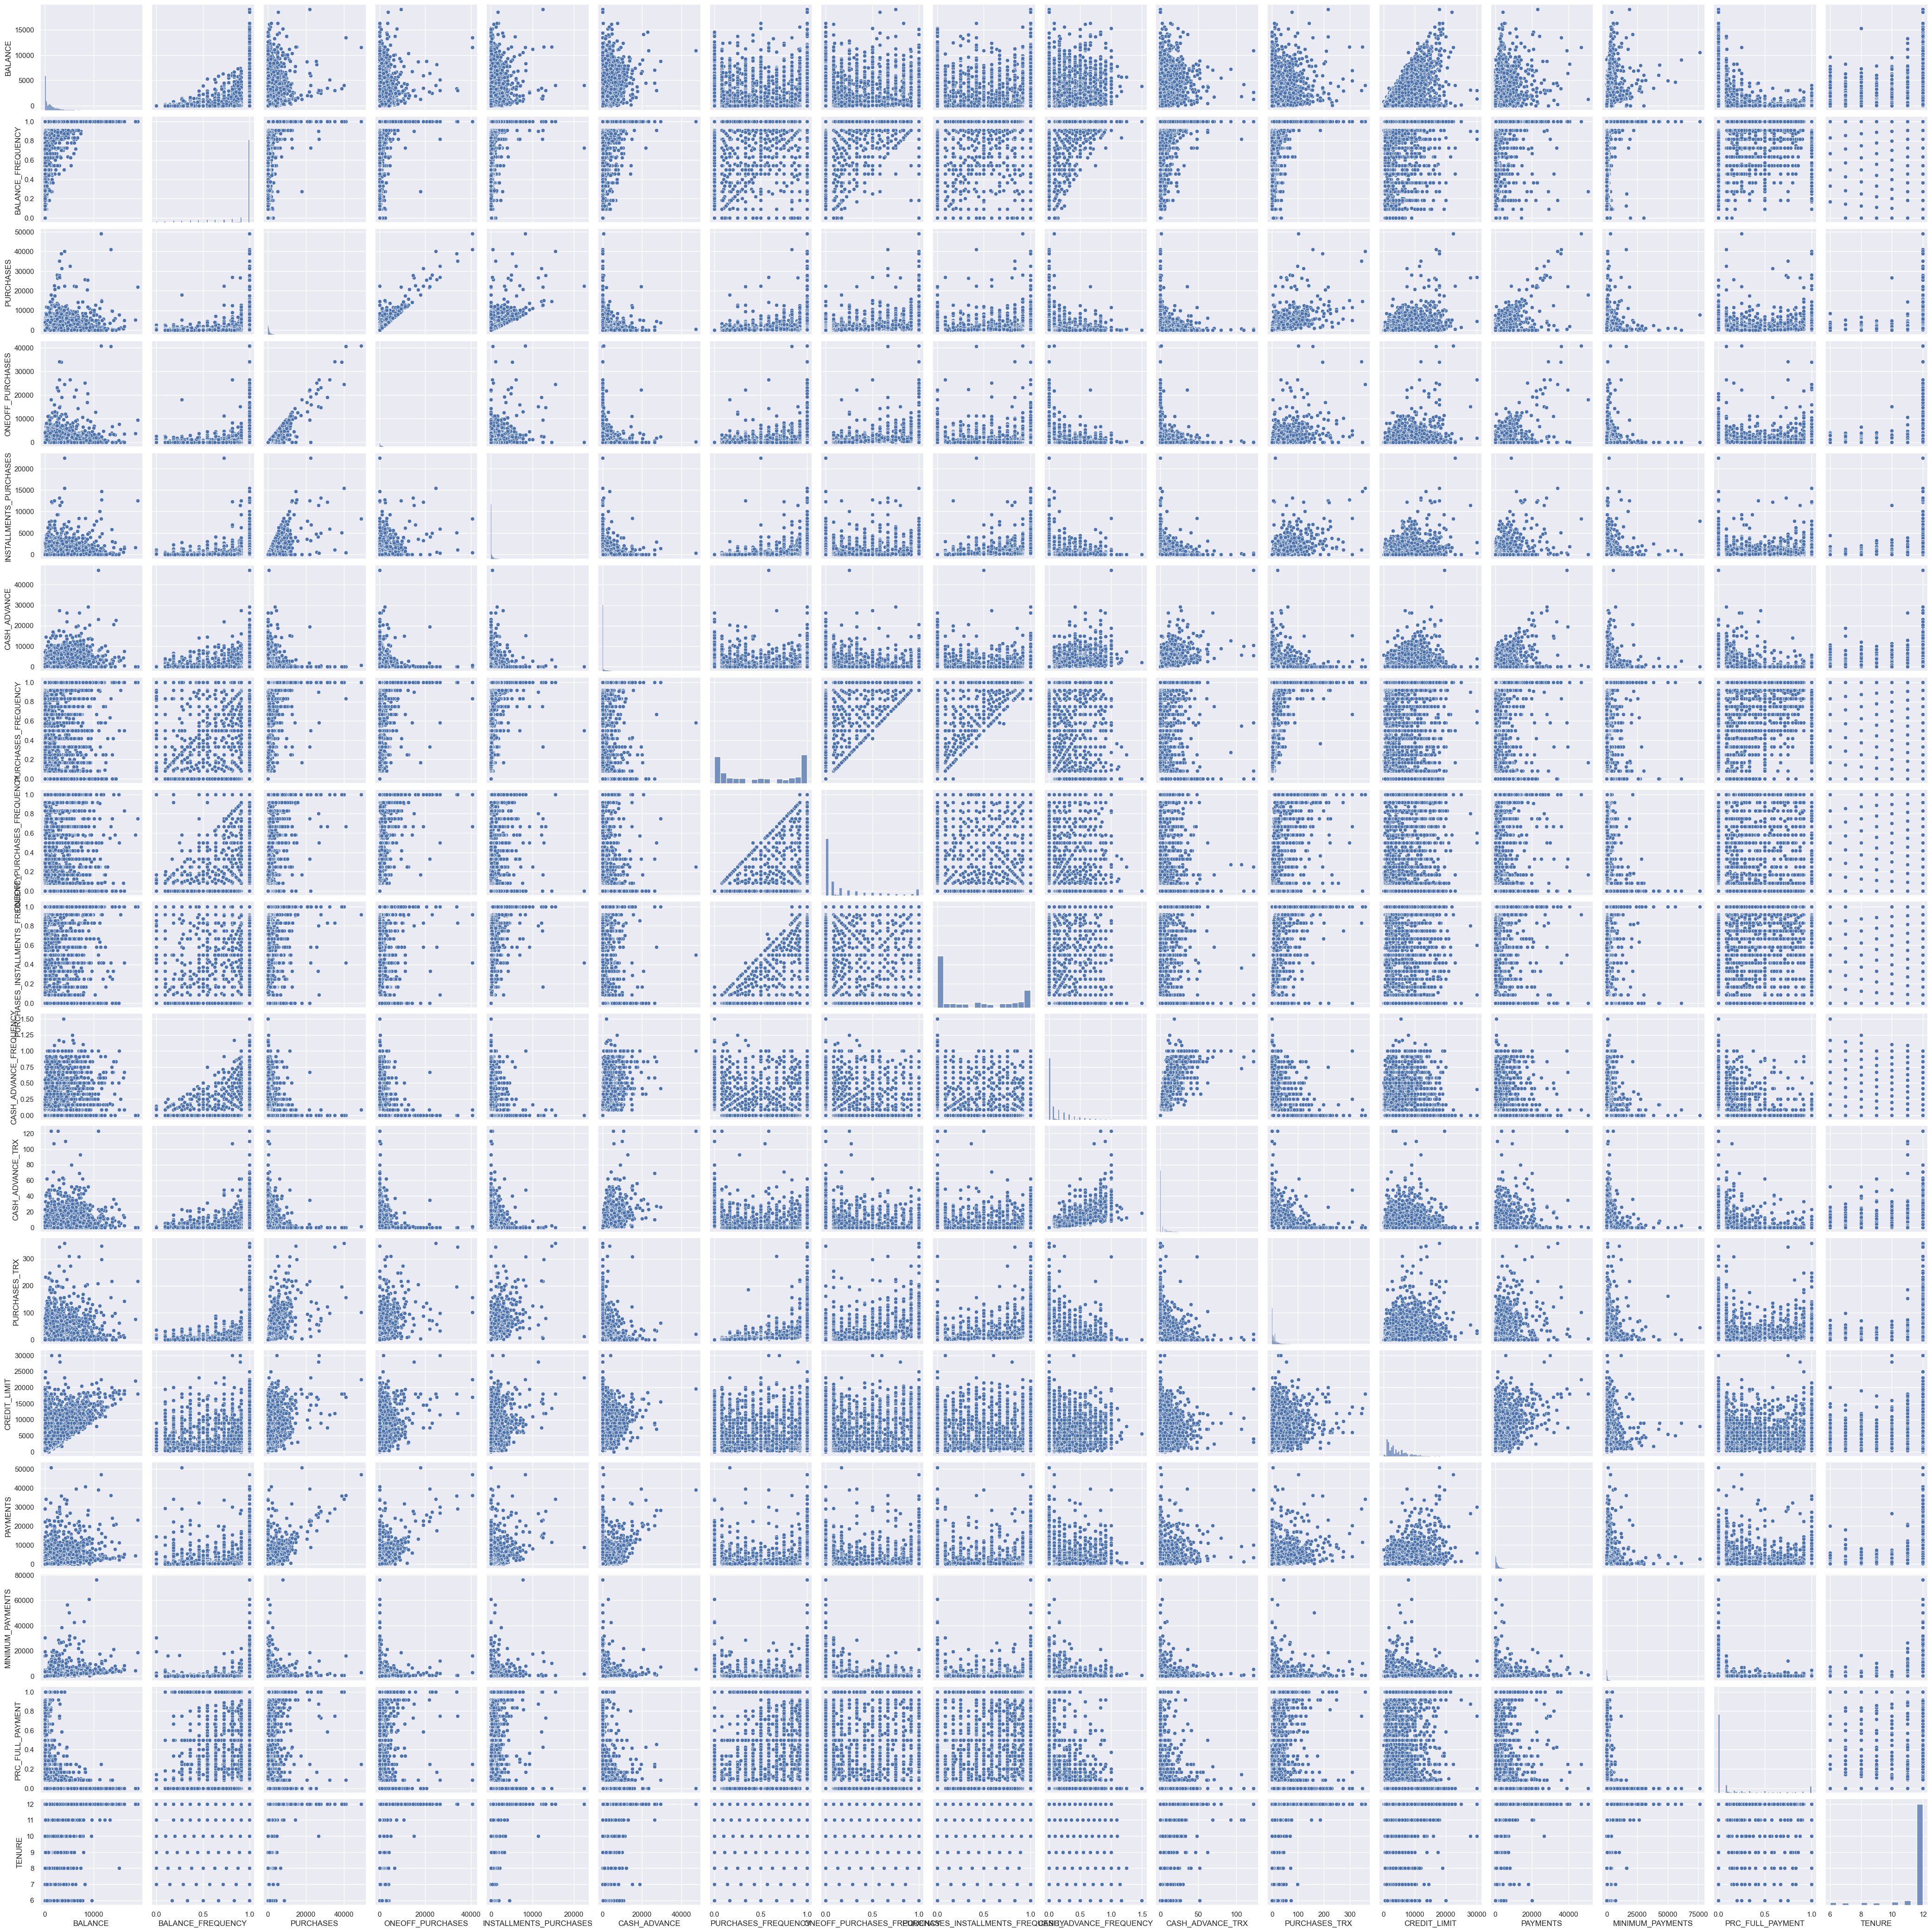

In [12]:
sns.pairplot(X_eda, )

<Axes: >

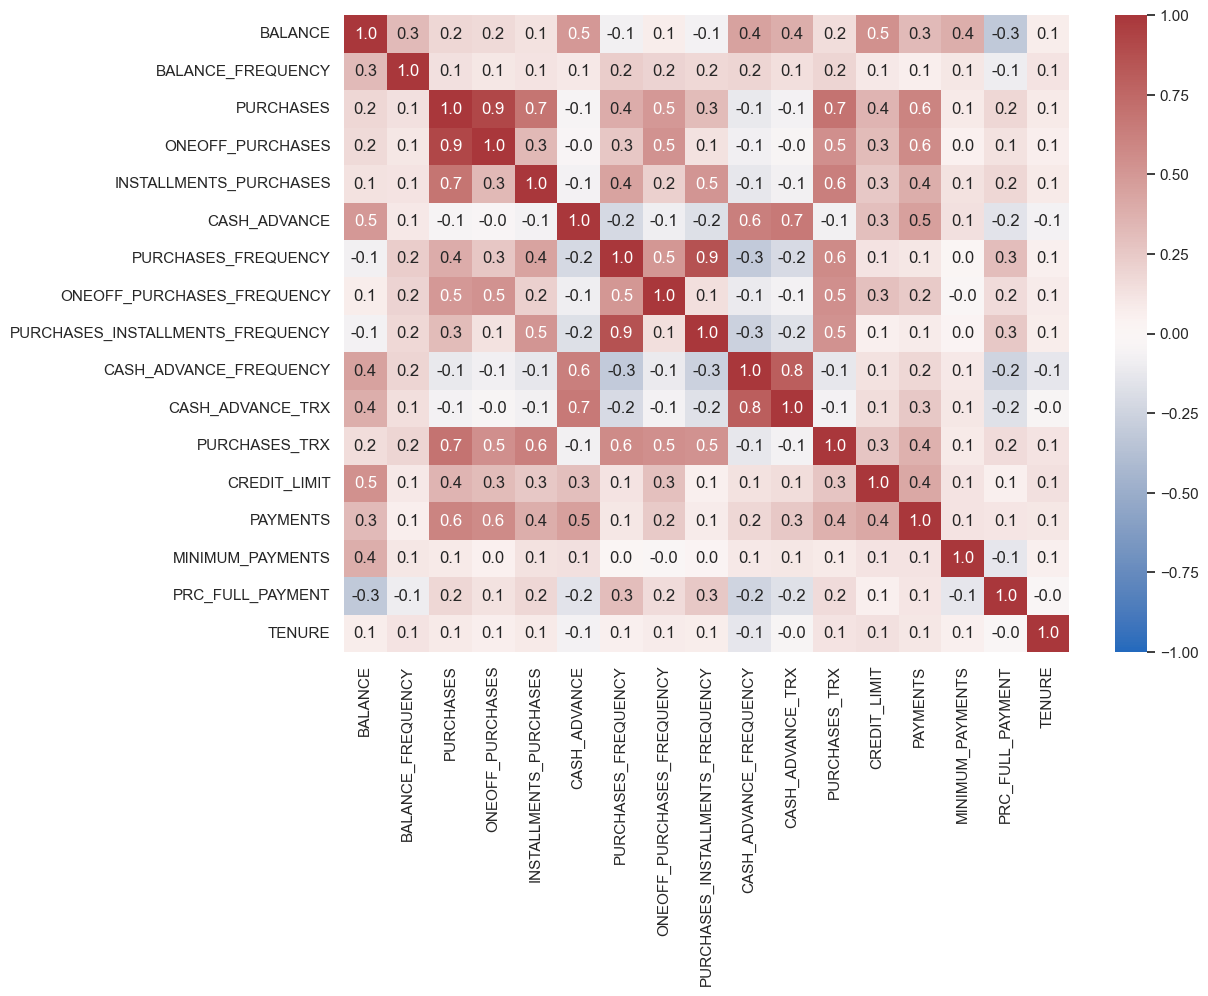

In [11]:
sns.heatmap(X_eda.corr(),annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')